In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rcparams
from numpy import sin, cos, pi

# Distribution of attachment fraction versus angle

## Parameters

`theta_min`, `theta_max`: minimum and maximum angle of attachment

`T`: Temperature ($k_B T$)

`R0`: Intrinsic radius of curvature of the filament $(nm)$

`Rb`: Radius of the cell $(nm)$

`r_mono`: Monomer radius $(nm)$

`lp`: Persistence length of the filament $(nm)$

`N`: Number of monomers in the filament

`E0_min`, `E0_max`: minimum and maximum binding energy $(k_B T)$

In [ ]:
theta_min = 0
theta_max = 180

theta_list = np.linspace(theta_min, theta_max, 1000) * pi / 180

kB = 1.0
T = 1
beta = 1.0 / (kB * T)

R0 = 100
Rb = 350
r_mono = 2.5

lp = 1300

N = 20

E0_min = -1.5
E0_max = -0.1

E0_points = 10

Ebind0_list = np.linspace(E0_min, E0_max, E0_points)

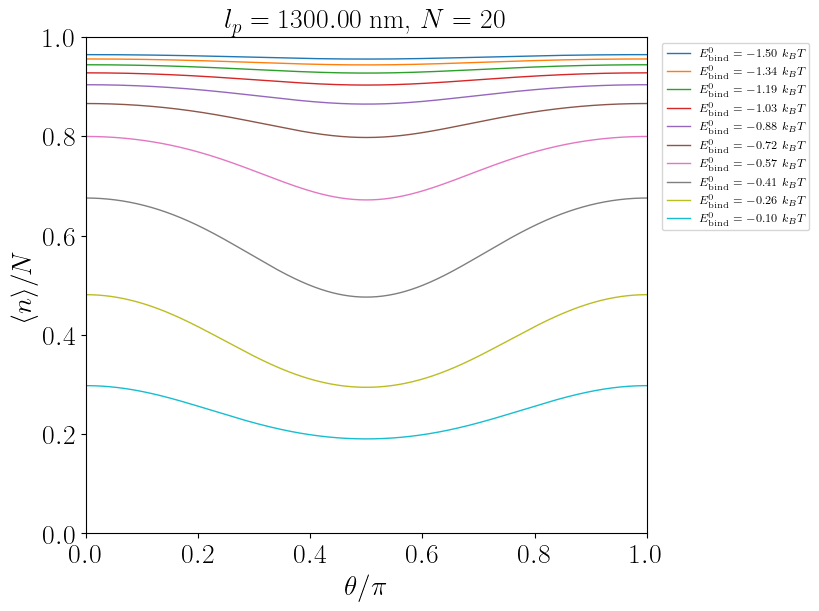

In [6]:
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)

for Ebind0_i, Ebind0 in enumerate(Ebind0_list):
    average_length_list = []
    for theta_i, theta in enumerate(theta_list):

        n_list = np.arange(1, N+1)
        p_list = np.zeros_like(n_list, dtype=float)

        for n_i, n in enumerate(n_list):
            dEbend = r_mono * (n - 1) * (kB * T *lp) * ( ( ((cos(theta)**2)) /Rb) - (1/R0)  )**2
            dEbind = n * Ebind0
            p_list[n_i] = (N - n + 1) * np.exp(-beta * (dEbend + dEbind))

        Z = np.sum(p_list)

        p_list = p_list / Z

        average_n = np.sum(n_list * p_list) 
        
        average_length_list.append(average_n)

    average_length_list = np.array(average_length_list)


    ax.plot(theta_list/pi, average_length_list/N, label=r'$E_{{\mathrm{{bind}}}}^0 = {:.2f}$ $k_BT$'.format(Ebind0), lw=1.0)

    ax.set_xlabel(r'$\theta/\pi$')
    ax.set_ylabel(r'$\langle n \rangle / N$')

    ax.set_xlim(theta_min/180, theta_max/180)
    ax.set_ylim(0, 1)

    ax.set_title(r'$l_p = {:.2f}$ nm, $N = {}$'.format(lp, N))
    
    ax.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.3, 1))

plt.show()